# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [3]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  2129k      0  0:00:43  0:00:43 --:--:-- 2041k
total 88
-rw-r--r-- 1 romain romain 22631 Jun 30 09:08 image_denoising.ipynb
drwx------ 2 romain romain 57344 Jun  9 15:06 paintings
-rw-r--r-- 1 romain romain     0 Jun 29 09:18 README.md
drwxr-xr-x 2 romain romain  4096 Jun 29 09:18 tests


In [1]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Kazimir_Malevich_13.jpg',
 './paintings/Jan_van_Eyck_15.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_34.jpg',
 './paintings/Edgar_Degas_271.jpg',
 './paintings/Titian_45.jpg',
 './paintings/Paul_Gauguin_65.jpg',
 './paintings/Andy_Warhol_89.jpg',
 './paintings/Pierre-Auguste_Renoir_151.jpg',
 './paintings/Pablo_Picasso_120.jpg',
 './paintings/Vincent_van_Gogh_305.jpg',
 './paintings/Pablo_Picasso_186.jpg',
 './paintings/Pablo_Picasso_63.jpg',
 './paintings/Albrecht_DuÌ\x88rer_244.jpg',
 './paintings/Frida_Kahlo_87.jpg',
 './paintings/Vincent_van_Gogh_558.jpg',
 './paintings/Pablo_Picasso_14.jpg',
 './paintings/Rene_Magritte_94.jpg',
 './paintings/El_Greco_63.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Paul_Gauguin_12.jpg',
 './paintings/Vasiliy_Kandinskiy_57.jpg',
 './paintings/Edgar_Degas_228.jpg',
 './paintings/Marc_Chagall_101.jpg',
 './paintings/Pierre-Auguste_Renoir_57.jpg',
 './paintings/Leonardo_da_Vinci_50.jpg',
 './paintings/Rene_Magritte_50.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

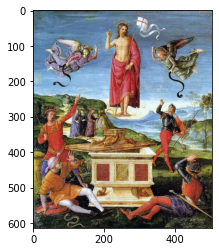

In [4]:
# YOUR CODE HERE
im = Image.open(dataset_paths[54])
plt.imshow(im)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [5]:
# YOUR CODE HERE
img_shape = im.size
img_shape

(505, 614)

In [6]:
img_dim = 2

❓ **What was in the image above?**

In [7]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [8]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [9]:
import numpy as np
import cv2

In [232]:
array_length = str(len(dataset_paths))
array_length

'1085'

In [10]:
# YOUR CODE HERE
dataset_images = []
for myFile in dataset_paths:
    image = cv2.imread (myFile)
    dataset_images.append(image)
dataset_images

[array([[[132, 156, 154],
         [137, 161, 159],
         [162, 187, 183],
         ...,
         [118, 102,  86],
         [ 83,  67,  51],
         [121, 101,  84]],
 
        [[130, 152, 150],
         [136, 161, 157],
         [168, 191, 187],
         ...,
         [ 97,  80,  67],
         [112,  96,  80],
         [ 95,  76,  61]],
 
        [[132, 153, 150],
         [100, 123, 118],
         [ 92, 114, 109],
         ...,
         [103,  87,  74],
         [121, 104,  91],
         [ 82,  65,  52]],
 
        ...,
 
        [[163, 190, 211],
         [200, 230, 249],
         [134, 164, 181],
         ...,
         [126, 139, 155],
         [126, 133, 150],
         [146, 146, 164]],
 
        [[152, 176, 198],
         [154, 181, 201],
         [150, 178, 195],
         ...,
         [137, 150, 166],
         [133, 140, 157],
         [148, 148, 166]],
 
        [[175, 199, 221],
         [181, 206, 226],
         [195, 223, 240],
         ...,
         [154, 167, 183],
  

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [234]:
# YOUR CODE HERE
dataset_images[5].shape, dataset_images[50].shape

((674, 511, 3), (614, 449, 3))

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [11]:
! pip install tqdm

You should consider upgrading via the '/home/romain/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [12]:
from tqdm import tqdm

In [13]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 931018.79it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [17]:
import tensorflow as tf

In [18]:
# YOUR CODE HERE
dataset_resize = []
for x in tqdm(dataset_images):
    im = tf.image.resize(dataset_images[x], (120,100))
    dataset_resizes.append(im)
dataset_resizes

  0%|          | 0/1085 [00:00<?, ?it/s]


TypeError: only integer scalar arrays can be converted to a scalar index

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [243]:
# YOUR CODE HERE
data_scaled = []
for i in dataset_images:
    data_scaled.append(dataset_resize[i]/255)

TypeError: only integer scalar arrays can be converted to a scalar index

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [244]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

NameError: name 'dataset_scaled' is not defined

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

In [571]:
# YOUR CODE HERE

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [572]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(dataset_scaled, ,
                                                    test_size = 0.2, 
                                                    random_state = 6)

In [573]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

In [42]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  298M  100  298M    0     0  2040k      0  0:02:29  0:02:29 --:--:-- 2172k     0  2033k      0  0:02:30  0:00:11  0:02:19 2175k159k


In [43]:
import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)

In [44]:
! rm data_painting_solution.pickle

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [22]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [36]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = Sequential()

encoder.add(Conv2D(8, (1,1), input_shape=(120, 100, 3), activation='relu'))
encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(8, (1, 1), activation='relu'))
encoder.add(MaxPooling2D(2))

encoder.add(Flatten())
encoder.add(Dense(latent_dimensions, activation='tanh'))

encoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 120, 100, 8)       32        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 60, 50, 8)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 50, 8)         72        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 25, 8)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 6000)              36006000  
Total params: 36,006,104
Trainable params: 36,006,104
Non-trainable params: 0
__________________________________________

👉 **Test your encoder below**

In [37]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 6000)              36006104  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 36,012,779
Trainable params: 36,012,779
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [66]:
# YOUR CODE HERE
score_baseline = ''

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [53]:
# YOUR CODE HERE
autoencoder.compile(loss='mse',
                    optimizer='adam';
                    metrics=['mae'])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=2)

autoencoder.fit(X_train, Y_train, 
                epochs=20, 
                batch_size=32,
                validation_split=0.3,
                callbacks=[es])

Epoch 1/20
28/28 [==============================] - 29s 922ms/step - loss: 0.0757
Epoch 2/20
28/28 [==============================] - 26s 925ms/step - loss: 0.0721
Epoch 3/20
28/28 [==============================] - 26s 927ms/step - loss: 0.0628
Epoch 4/20
28/28 [==============================] - 25s 880ms/step - loss: 0.0460
Epoch 5/20
28/28 [==============================] - 25s 896ms/step - loss: 0.0400
Epoch 6/20
28/28 [==============================] - 26s 915ms/step - loss: 0.0356
Epoch 7/20
28/28 [==============================] - 26s 914ms/step - loss: 0.0326
Epoch 8/20
28/28 [==============================] - 26s 919ms/step - loss: 0.0294
Epoch 9/20
28/28 [==============================] - 26s 923ms/step - loss: 0.0276
Epoch 10/20
28/28 [==============================] - 26s 930ms/step - loss: 0.0263
Epoch 11/20
28/28 [==============================] - 26s 924ms/step - loss: 0.0251
Epoch 12/20
28/28 [==============================] - 27s 970ms/step - loss: 0.0241
Epoch 13/20
2

❓ **Plot your training and validation loss at each epoch using the cell below**

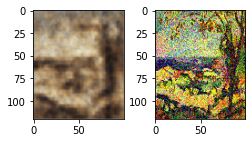

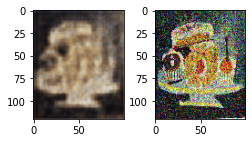

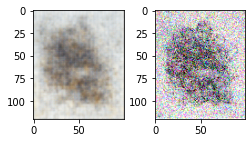

<Figure size 432x288 with 0 Axes>

In [57]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
prediction = autoencoder.predict(X_train, verbose=0, batch_size=100)

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))
    ax1.imshow(prediction[i].reshape(120,100,3))
    ax2.imshow(X_train[i].reshape(120,100,3))
    plt.show()
# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [68]:
# YOUR CODE HERE
Y_pred = autoencoder.predict(Y_test)
score_test = autoencoder.score(X_test,Y_test)

AttributeError: 'Functional' object has no attribute 'score'

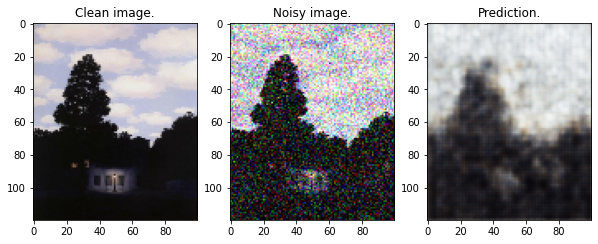

In [64]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [67]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()

NameError: name 'score_test' is not defined